<a href="https://colab.research.google.com/github/emiliagyr/EstadisticaExperimental/blob/main/P1_PCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pingouin
!pip install pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 15.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import seaborn as sns
import pingouin as pg

Opcional: si el contenido de las columnas no se muestra completo

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
#dv = variable dependiente
#group = niveles de la variable independiente

#1. Leer los datos del documento .sav (SPSS) o .csv (Excel)

In [5]:
df = pd.read_spss("PCI.sav")
df

,SEXO,COND,PCI
0,Femenino,Semejanza Intergrupal,2.000000
1,Femenino,Semejanza Intergrupal,2.000000
2,Femenino,Semejanza Intergrupal,2.041667
3,Femenino,Semejanza Intergrupal,2.083333
4,Femenino,Semejanza Intergrupal,2.458333
5,Femenino,Semejanza Intergrupal,2.541667
6,Femenino,Semejanza Intergrupal,2.750000
7,Femenino,Semejanza Intergrupal,2.791667
8,Femenino,Diferencia Intergrupal,1.541667
9,Femenino,Diferencia Intergrupal,1.958333


#2. Estadisticos descriptivos

In [6]:
df.describe()

,PCI
count,30.000000
mean,2.329167
std,0.388309
min,1.541667
25%,2.010417
50%,2.250000
75%,2.625000
max,3.250000


In [ ]:
#Variable independiente: Relaciones intergrupales

##3. Normalidad

In [7]:
#Constraste de normalidad
pg.normality(data=df, dv="PCI", group="COND", method="shapiro")

,W,pval,normal
COND,,,
Semejanza Intergrupal,0.915359,0.163601,True
Diferencia Intergrupal,0.942930,0.420641,True


<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

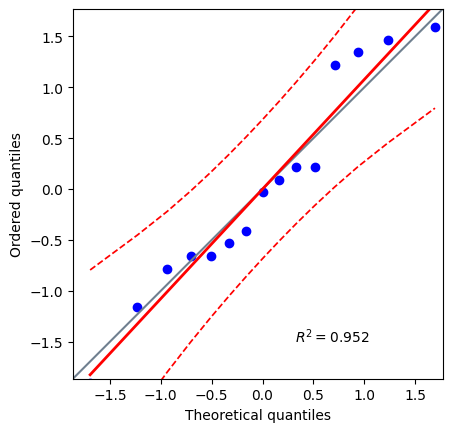

In [8]:
#Gráficos: QQPlot de cada nivel de la VI
pg.qqplot(df.query("COND == 'Diferencia Intergrupal'")["PCI"])

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

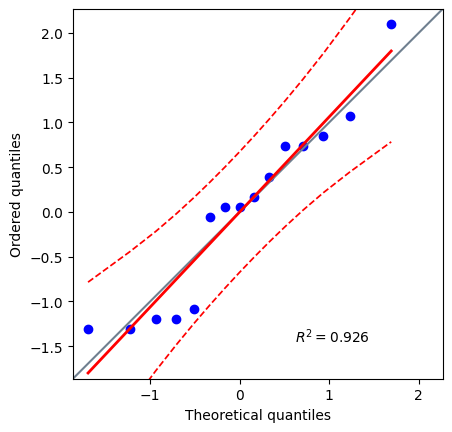

In [9]:
pg.qqplot(df.query("COND == 'Semejanza Intergrupal'")["PCI"])

In [10]:
#Estadisticos de forma: Asimetría
df.groupby("COND").skew(numeric_only=True) #numeric_only es para que solo utilice datos numéricos

,PCI
COND,
Diferencia Intergrupal,0.122790
Semejanza Intergrupal,0.203989


In [11]:
#Estadisticos de forma: Curtosis
df.groupby("COND").apply(pd.DataFrame.kurt, numeric_only=True)

,PCI
COND,
Diferencia Intergrupal,-0.660332
Semejanza Intergrupal,-0.598805


##4. Contraste de medias

In [12]:
#Homogeneidad de varianzas: Sólo para contrastes paramétricos de muestras independientes
pg.homoscedasticity(data=df, dv="PCI", group="COND")

,W,pval,equal_var
levene,0.104497,0.7489,True


In [13]:
pg.pairwise_tests(data=df, dv="PCI", between="COND", effsize="cohen", correction=False, alternative="less")
#correction responde a la necesidad de hacer una corrección por varianzas no homogéneas. Por lo tanto, False implica varianzas homogéneas.
#Paired True = intrasujeto = within/ Paired False = intersujeto = between
#Alternative greater A  >  B / Alternative less A < B

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,cohen
0,COND,Diferencia Intergrupal,Semejanza Intergrupal,False,True,-2.28562,28.0,less,0.015025,4.548,-0.83459
